In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Figures à mettre dans la présentation et le rapport
"""

DataFolder="C:/Users/Julie_000/Desktop/Stage/Stage_l3"
#DataFolder="E:/Clément/Julie/Stage_L3"

# Importations des librairies

In [2]:
from mat4py import loadmat #pour charger des .mat
import matplotlib
import matplotlib.pyplot as plt # pour tracer les figures
import os # pour modifier le dossier de travail
import numpy as np 
from pathlib import Path # Pour rendre les Path compatibles entre Mac et Windows
from matplotlib import rc #Les trois prochaines lignes pour que Ã§a ressemble Ã  latex
rc('font', size=16)
rc('text', usetex=True)
matplotlib.rcParams['text.usetex'] = True
import scipy as sc
import matplotlib.cm as cm #colormaps
from matplotlib.colors import Normalize #Pour l'utilisation des couleurs dans quiver
from matplotlib.ticker import MaxNLocator #pour les courbes de niveau
from scipy.ndimage import gaussian_filter #Filtrage gaussien

from scipy.linalg import pinv as scpinv
from numpy.linalg import pinv as nppinv

import fonctions_projet_divergence as fpd#pour les données

colormap2=cm.PiYG#colormap

from mpl_toolkits.mplot3d import Axes3D#plot3D

from scipy.ndimage import median_filter
import matplotlib.patches as mpatches #pour le nageur

# Chargement des données
## Choix des variables

In [3]:
prof=15 # Choisi sur quelle profondeur d'eau travailler (5, 10 ou 15 mm)
m=5

## Constitution des tableaux
### Données brutes

In [37]:
os.chdir(Path(DataFolder)) # se place dans le dossier où est rangée la manip
manips=loadmat('PIVnagseul.mat') # Charge les données dans la variable manip

piv=fpd.PIV(prof,manips)#données pour la profondeur

P=fpd.nb_plan(prof)#nombre de plan dans la profondeur choisie

u,v,x,y,z=fpd.donnees2(P,piv)
print(np.shape(u),np.shape(v),np.shape(x),np.shape(y),np.shape(z))

#tableau des z:
z=np.reshape(z,(P,1))
z_2D=np.hstack((z,z))
for i in range(57):
    z_2D=np.hstack((z_2D,z))
print(np.shape(z_2D))

z_3D=np.hstack((z_2D,z_2D))
for i in range(57):
    z_3D=np.hstack((z_3D,z_2D))
z_3D=np.reshape(z_3D,(P,59,59))
print(np.shape(z_3D))
z=np.reshape(z,(P))

(49, 60, 60) (49, 60, 60) (49, 60, 60) (49, 60, 60) (49,)
(49, 59)
(49, 59, 59)


# Fonctions de plot

In [5]:
def plot_champ_vitesse(u,v,x,y,title):
    "Fonction de tracé du champ de vitesse"
    #norme
    f=2
    u1=np.copy(u)[::f,::f]
    v1=np.copy(v)[::f,::f]
    x1=np.copy(x)[::f,::f]
    y1=np.copy(y)[::f,::f]
    
    velocity=np.sqrt(u1**2+v1**2)
    velmax=np.mean(velocity)+3*np.std(velocity)#norme maximale représentée sur la colormap borne sup arbitraire
    colors = np.copy(velocity)
    colors[velocity>velmax]=velmax
    norm = Normalize()
    norm.autoscale(colors)

    #plot   
    fig,ax=plt.subplots(num=title, figsize=figsize)
    im=ax.quiver(x1,y1,u1/velocity,v1/velocity,colors,headwidth=8)
    cbar=plt.colorbar(im, ax=ax)  #pour la barre de couleur
    cbar.set_label(r'vitesse en $mm\cdot s^{-1}$',fontsize=fontsize)
    circle = mpatches.Circle((0,0), 6, color='gainsboro')#patch
    ax.add_patch(circle)
    
    fig.suptitle(title,fontsize=18)
    plt.xlabel(r"$x (mm)$",fontsize=fontsize)
    plt.ylabel(r"$y (mm)$",fontsize=fontsize)
    plt.show()
    
def plot_divergence(div,dx,dy,title):
    "Tracé des divergences"
    #norme
    vmax,vmin=np.max(div),np.min(div)
    norm=Normalize(vmin=vmin, vmax=vmax)
    levels = MaxNLocator(nbins=25).tick_values(vmin,vmax)
    
    fig, l0 = plt.subplots(num=title,figsize=figsize)
    im0 = l0.contourf(dx,dy,div,levels=levels, cmap=colormap2,norm=norm)
    l0.set_xlabel(r"$x (mm)$",fontsize=fontsize)
    l0.set_ylabel(r"$y (mm)$",fontsize=fontsize)
    circle = mpatches.Circle((0,0), 6, color='gainsboro')#patch
    l0.add_patch(circle)
    cbar=plt.colorbar(im0,ax=l0)
    cbar.set_label(r'$s^{-1}$',fontsize=fontsize)
   
    fig.suptitle(title,fontsize=20)
    plt.show()
    
def plot_divergence_modelisation(div,dx,dy,title):
    "Tracé des divergences"
    #norme
    div1=np.transpose(div)
    vmax,vmin=np.max(div1),np.min(div1)
    norm=Normalize(vmin=vmin, vmax=vmax)
    levels = MaxNLocator(nbins=25).tick_values(vmin,vmax)
    
    fig, l0 = plt.subplots(num=title,figsize=figsize)
    im0 = l0.contourf(dy,dx,div1,levels=levels, cmap=cm.seismic,norm=norm)
    l0.set_xlabel(r"$x (mm)$",fontsize=fontsize)
    l0.set_ylabel(r"$y (mm)$",fontsize=fontsize)
    circle = mpatches.Circle((0,0), 6, color='gainsboro')#patch
    l0.add_patch(circle)
    cbar=plt.colorbar(im0,ax=l0)
    cbar.set_label(r'$s^{-1}$',fontsize=fontsize)
   
    fig.suptitle(title,fontsize=20)
    plt.show()

# Champs de PIV

<IPython.core.display.Javascript object>


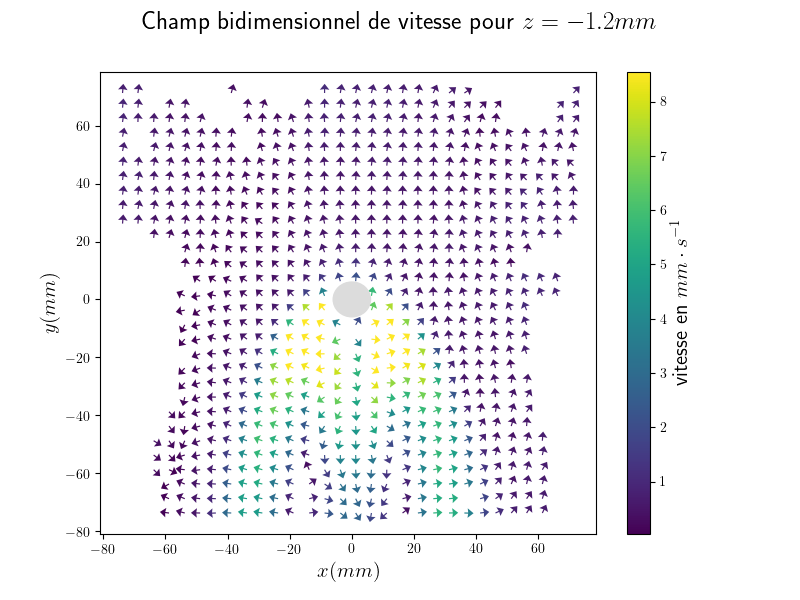

C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [38]:
%matplotlib notebook
fontsize=15
figsize=(8,6)
plan=2
plot_champ_vitesse(u[plan],v[plan],x[plan],y[plan],r'Champ bidimensionnel de vitesse pour $z = {} mm$'.format(np.around(-z[plan],decimals=1)))

# Divergence 2D
## plot

In [7]:
u0=np.copy(u)
v0=np.copy(v)
x0=np.copy(x)
y0=np.copy(y)
div_2D=np.zeros((P,59,59))
dx=np.zeros((P,59,59))
dy=np.zeros((P,59,59))

for plan in range(P):
    div_2D[plan],dx[plan],dy[plan]=fpd.divergence2D_gauss(u0[plan],v0[plan],x0[plan],y0[plan],1)
    
print(np.shape(div_2D))
print(np.shape(z))

(49, 59, 59)
(49,)


In [8]:
print(np.shape(div_2D[plan]))

(59, 59)


<IPython.core.display.Javascript object>


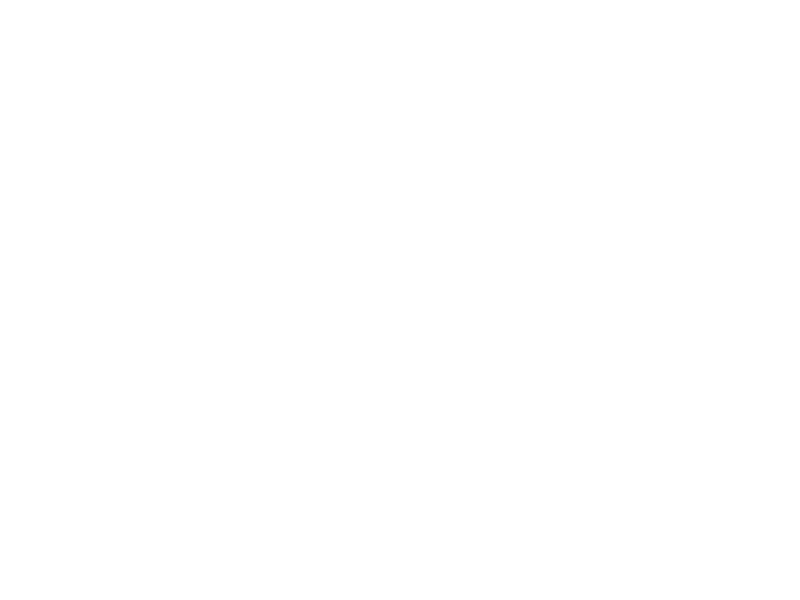

In [9]:
plan=2
plot_divergence(div_2D[plan],dx[plan],dy[plan],r'Divergence bidimensionnelle pour $z = {} mm$'.format(np.around(-z[plan],decimals=1)))

In [10]:
print(u[plan])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.04233982 0.         0.0835949  ... 0.52533803 0.53915423 0.54309142]
 [0.06315652 0.         0.10169563 ... 0.         0.55491337 0.51140606]
 [0.05262087 0.10253977 0.         ... 0.         0.58396494 0.        ]]


In [11]:
plan=2
plot_divergence_modelisation(div_2D[plan],dx[plan],dy[plan],r'Divergence bidimensionnelle pour $z = {} mm$'.format(np.around(-z[plan],decimals=1)))

# Superposition

In [12]:
def plot_superposition(div,u,v,dx,dy,x,y,title):
    "Tracé des divergences superposées avec le champ de vitesse"
    #norme divergence
    vmax,vmin=np.max(div),np.min(div)
    norm=Normalize(vmin=vmin, vmax=vmax)
    levels = MaxNLocator(nbins=25).tick_values(vmin,vmax)
    
    fig, l0 = plt.subplots(num=title,figsize=(8,5))
    
    
    #plot divergence
    im0 = l0.contourf(dx,dy,div,levels=levels, cmap=colormap2,norm=norm)
    circle = mpatches.Circle((0,0), 6, color='gainsboro')#patch
    l0.add_patch(circle)
    cbar=plt.colorbar(im0,ax=l0)
    cbar.set_label(r'$s^{-1}$',fontsize=12)
    
    #plot champ vitesse
    f=2
    u1=np.copy(u)[::f,::f]
    v1=np.copy(v)[::f,::f]
    x1=np.copy(dx)[::f,::f]
    y1=np.copy(dy)[::f,::f]
    
    #Norme flèches
    velocity=np.sqrt(u1**2+v1**2)
    velmax=np.mean(velocity)+3*np.std(velocity)#norme maximale représentée sur la colormap borne sup arbitraire
    colors = np.copy(velocity)
    colors[velocity>velmax]=velmax
    norm = Normalize()
    norm.autoscale(colors)
    im=l0.quiver(x1,y1,u1/velocity,v1/velocity,colors,headwidth=8)
    cbar2=plt.colorbar(im, ax=l0)  #pour la barre de couleur
    cbar2.set_label(r'vitesse en $mm\cdot s^{-1}$',fontsize=12)
    
    l0.set_xlabel(r"$x (mm)$",fontsize=fontsize)
    l0.set_ylabel(r"$y (mm)$",fontsize=fontsize)
    fig.suptitle(title,fontsize=17)
    plt.show()

In [13]:
print(np.shape(v[plan]))

(60, 60)


<IPython.core.display.Javascript object>


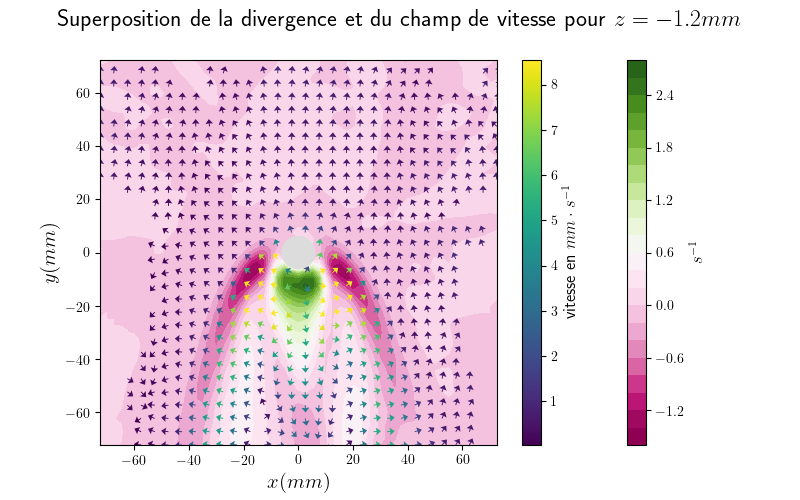

C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [40]:
plan=2
plot_superposition(div_2D[plan],u[plan][:-1,:-1],v[plan][:-1,:-1],dx[plan],dy[plan],x[plan],y[plan],r'Superposition de la divergence et du champ de vitesse pour $z = {} mm$'.format(np.around(-z[plan],decimals=1)))

## Validation

In [15]:
ligne_x=np.reshape(np.arange(-9.83,10.13,0.1),(1,200))#bidouillage pour que 0 ne soit pas dans le tableau
colonne_x=np.ones((200,1))
x_test=np.dot(colonne_x,ligne_x)
y_test=np.transpose(x_test)
Xi=2/(3*np.pi)

In [16]:
def r_cartesien(x,y):
    "Donne r cylindrique pour x et y donnés"
    r=np.sqrt(x**2+y**2)
    not_1=np.where(r==1,5,r)
    not_0=np.where(not_1==0,18,not_1)
    return(not_0)

def theta_cartesien1(x,y):
    "Donne theta cylindrique pour x et y donnés (ne marche que parce que x.any()==0 False)"
    return(np.arctan(y/x)+np.pi/2-np.sign(x)*np.pi/2)

def x_y(r,theta):
    return(r*np.cos(theta),r*np.sin(theta))

def vitesse_en_cartesien(v_r,v_theta):
    "retourne les coordonnées cartésiennes de la vitesse à partir des cylindriques"
    v_x=v_r*np.cos(theta)-v_theta*np.sin(theta)
    v_y=v_r*np.sin(theta)+v_theta*np.cos(theta)
    return(v_x,v_y)

def u_r(r,theta):
    "Retourne la coordonnée suivant e_r de la solution analytique"
    return(Xi*np.cos(theta)*(np.sqrt(r**2-1)/r**2+3*np.arcsin(1/r)))

def u_theta(r,theta):
    "Retourne la coordonnée suivant e_theta de la solution analytique"
    return(Xi*np.sin(theta)*(np.sqrt(r**2-1)/r**2-3*np.arcsin(1/r)))

def divergence_analytique(r,theta):
    return(Xi*np.cos(theta)*(-3*np.sqrt(1-1/r**2)/(r**2-1)+1/(r*np.sqrt(r**2-1))))


In [17]:
#theta et r
theta=theta_cartesien1(x,y)
r= r_cartesien(x,y)

#vitesses cylindriques
v_r=u_r(r,theta)
v_theta=u_theta(r,theta)

#vitesses en cartésien
v_x,v_y=vitesse_en_cartesien(v_r,v_theta)

In [18]:
def plot_champ_vitesse_test(u,v,x,y,title):
    "Fonction de tracé du champ de vitesse"
    #norme
    f=6
    u1=np.copy(u)[::f,::f]
    v1=np.copy(v)[::f,::f]
    x1=np.copy(x)[::f,::f]
    y1=np.copy(y)[::f,::f]
    
    velocity=np.sqrt(u1**2+v1**2)
    velmax=np.mean(velocity)+3*np.std(velocity)#norme maximale représentée sur la colormap borne sup arbitraire
    colors = velocity
    colors[velocity>velmax]=velmax
    norm = Normalize()
    norm.autoscale(colors)

    #plot   
    fig,ax=plt.subplots(num=title, figsize=figsize)
    im=ax.quiver(x1,y1,u1/velocity,v1/velocity,colors,scale=40)
    cbar=plt.colorbar(im, ax=ax)  #pour la barre de couleur
    cbar.set_label(r'vitesse en $mm\cdot s^{-1}$',fontsize=fontsize)
    
    fig.suptitle(title,fontsize=18)
    plt.xlabel(r"$x (mm)$",fontsize=fontsize)
    plt.ylabel(r"$y (mm)$",fontsize=fontsize)
    plt.show()

<IPython.core.display.Javascript object>


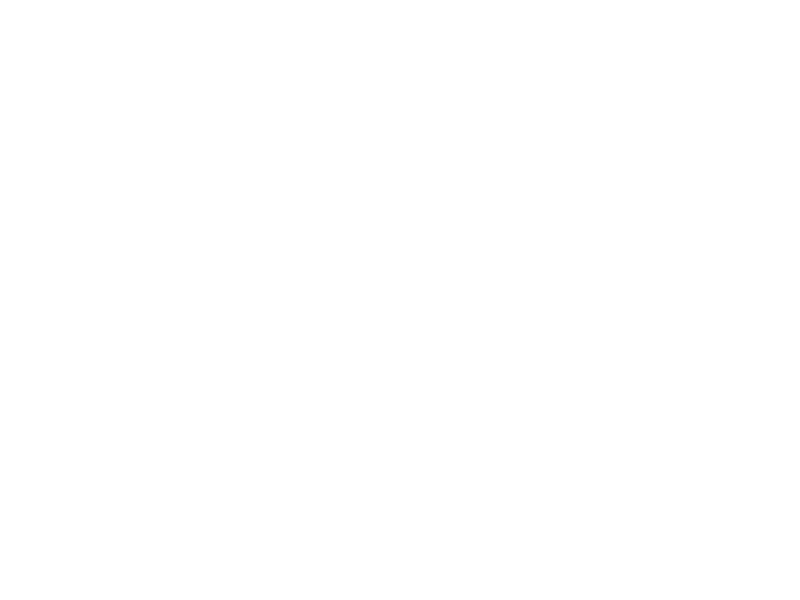

ValueError: too many values to unpack (expected 2)

In [19]:
%matplotlib notebook
plot_champ_vitesse_test(v_x,v_y,x_test,y_test, "champ de vitesse validation")

In [21]:
theta=theta_cartesien1(x_test,y_test)
r= r_cartesien(x_test,y_test)
v_r=u_r(r,theta)
v_theta=u_theta(r,theta)
v_x,v_y=vitesse_en_cartesien(v_r,v_theta)
div_analytique=divergence_analytique(r,theta)

"Dérivation"
du_test,dv_test=fpd.deriv(v_x,x_test,1),fpd.deriv(v_y,y_test,0)
dx_test,dy_test=fpd.abcisse(x_test,1),fpd.abcisse(y_test,0)

"Remise à la bonne taille"
du_test,dv_test=fpd.good_shape(du_test),fpd.good_shape(dv_test)
dx_test,dy_test=fpd.good_shape(dx_test),fpd.good_shape(dy_test)

"somme des tableaux"
div_numerique = fpd.somme(du_test,dv_test)

print(np.shape(div_numerique),np.shape(div_analytique),np.shape(dx_test),np.shape(dy_test))

(199, 199) (200, 200) (199, 199) (199, 199)


C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in arcsin
C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in arcsin
C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


In [22]:
def plot_comparaison_divergence_brut(div0,div1,dx,dy,x,y,title):
    "Fonction pour plot la comparaison, mettre div_analytique en premier"
    #norme
    extremums=np.array([np.max(div0),np.min(div0),np.max(div1),np.min(div1)])
    vmax,vmin=np.max(extremums),np.min(extremums)
    norm=Normalize(vmin=vmin, vmax=vmax)

    #Figure
    fig, (l0,l1) = plt.subplots(nrows=1,ncols=2,num=title,figsize=(12,5))
    im0 = l0.pcolormesh(x,y,div0, cmap=cm.RdBu,norm=norm)
    l0.set_title("Divergence analytique",fontsize=fontsize)
    l0.set_xlabel(r'$x (mm)$',fontsize=fontsize2)
    l0.set_ylabel(r'$y (mm)$',fontsize=fontsize2)
    cbar=plt.colorbar(im0,ax=l0)
    cbar.set_label(r'$s^{-1}$',fontsize=fontsize2)

    im1 = l1.pcolormesh(dx,dy,div1, cmap=cm.RdBu,norm=norm)
    l1.set_title("Divergence numérique",fontsize=fontsize)
    l1.set_xlabel(r"$x (mm)$",fontsize=fontsize2)
    l1.set_ylabel(r"$y (mm)$",fontsize=fontsize2)
    cbar=plt.colorbar(im1,ax=l1)
    cbar.set_label(r'$s^{-1}$',fontsize=fontsize2)
    
    fig.tight_layout(pad=3)
    fig.suptitle(title,fontsize=20)
    plt.show()

<IPython.core.display.Javascript object>


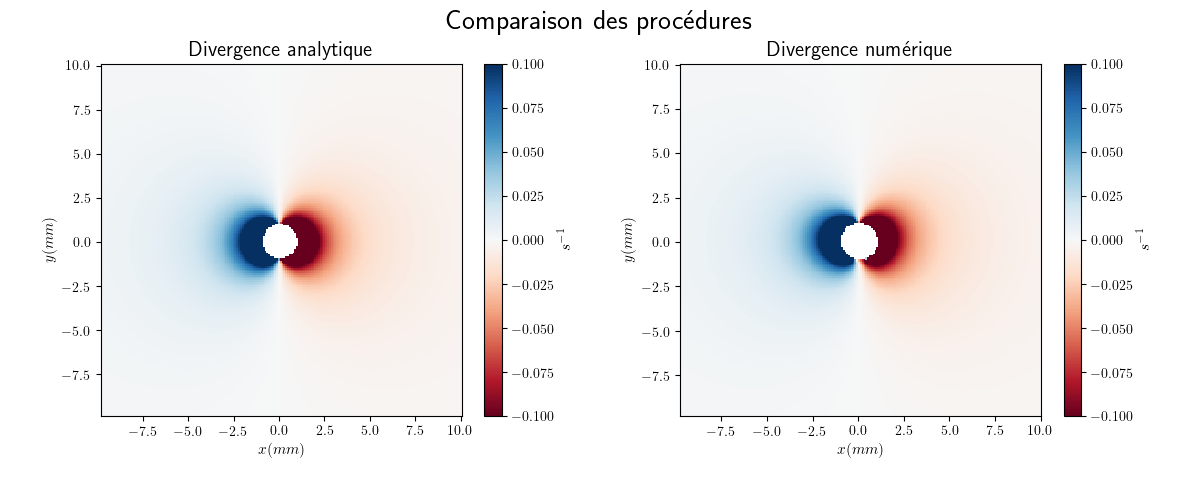

In [23]:
fontsize2=11
plot_comparaison_divergence_brut(div_analytique,div_numerique,dx_test,dy_test,x_test,y_test,"Comparaison des procédures")

# Petit schéma

In [24]:
def petit_schema(dx,dy,axe,plan):
    "Tracé d'un schéma explicatif'"
    trace=np.zeros(np.shape(dx))
    color=np.copy(trace)
    fig, l0 = plt.subplots(figsize=(6,6))
    im0 = l0.pcolormesh(dx,dy,np.zeros(np.shape(dx)),cmap=cm.Paired)
    if axe==0:
        line=mpatches.Rectangle((-73,-2),150,4,color='midnightblue')
    elif axe==1:
        line=mpatches.Rectangle((-2,-73),4,150,color='midnightblue')
    l0.set_xlabel(r'$x (mm)$',fontsize=25)
    l0.set_ylabel(r'$y (mm)$',fontsize=25)
    
    circle = mpatches.Circle((0,0), 13, color='snow')#patch
    l0.add_patch(line)
    l0.add_patch(circle)
    
    plt.show()

<IPython.core.display.Javascript object>


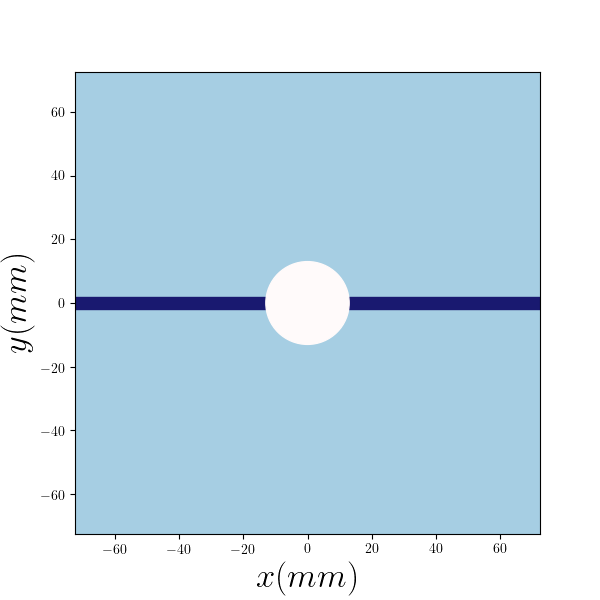

In [25]:
plan=29
axe=0
petit_schema(dx[plan],dy[plan],axe,plan)

# vz

In [26]:
def vitesse_nageur(prof):
    "donne la vitesse du nageur pour une profondeur. Elle est suivant ey"
    if prof==5:
        return(60)
    elif prof==10:
        return(59)
    elif prof==15:
        return(62)

In [42]:
vz0=fpd.methode_Galerkine(u,v,x,y,z,P,m,prof)
v_nageur=vitesse_nageur(prof)
u=u0[:,:-1,:-1]/v_nageur
v=v0[:,:-1,:-1]/v_nageur
vz=vz0/v_nageur
x=x0[:,:-1,:-1]
y=y0[:,:-1,:-1]
xmax=59
ymax=59

#tableau des z:
z=np.reshape(z,(P,1))
z_2D=np.hstack((z,z))
for i in range(xmax-2):
    z_2D=np.hstack((z_2D,z))
print(np.shape(z_2D))
print(np.shape(v))

(49, 59)
(49, 59, 59)


In [45]:
def colonne(u,plan,axe):
    #if variable_fixe=='x':
    v=np.copy(u)
    if axe==0:
        if plan==28:
            v[28:31,:]=0
        elif 29<=plan<=30:
            v[27:33,:]=0
        elif plan==32:
            v[28:31,:]=0
    elif axe==1:     
        if plan==28:
            v[:,28:31]=0
        elif 29<=plan<=30:
            v[:,27:33]=0
        elif plan==32:
            v[:,28:31]=0
    return(v)

def plot_champ_vitessez(u,v,x,y,title,xlabel,ylabel,plan):
    "Fonction de tracé du champ de vitesse 2D"
    f=2
    u1=colonne(u,plan,0)[::f,::f]
    v1=colonne(v,plan,0)[::f,::f]
    x1=np.copy(x)[::f,::f]
    y1=np.copy(y)[::f,::f]
    velocity1=np.sqrt(u1**2+v1**2)
    velmax1=np.mean(velocity1)+3*np.std(velocity1)#norme maximale représentée sur la colormap borne sup arbitraire
    colors1 = np.copy(velocity1)
    colors1[velocity1>velmax1]=velmax1
   
    norm = Normalize()
    norm.autoscale(colors1)
    
    #plot   
    fig,ax=plt.subplots(num=title,figsize=figsize)
    im=ax.quiver(x1,y1,u1/velocity1,v1/velocity1,colors1,cmap=plt.cm.rainbow,scale=40,headwidth=6)
    cbar=plt.colorbar(im,ax=ax)
    cbar.set_label(r'$v/v_{nageur}$',fontsize=fontsize)
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel(ylabel,fontsize=fontsize)
    
    fig.suptitle(title,fontsize=16)
    plt.tight_layout(pad=3)
    plt.show()

<IPython.core.display.Javascript object>


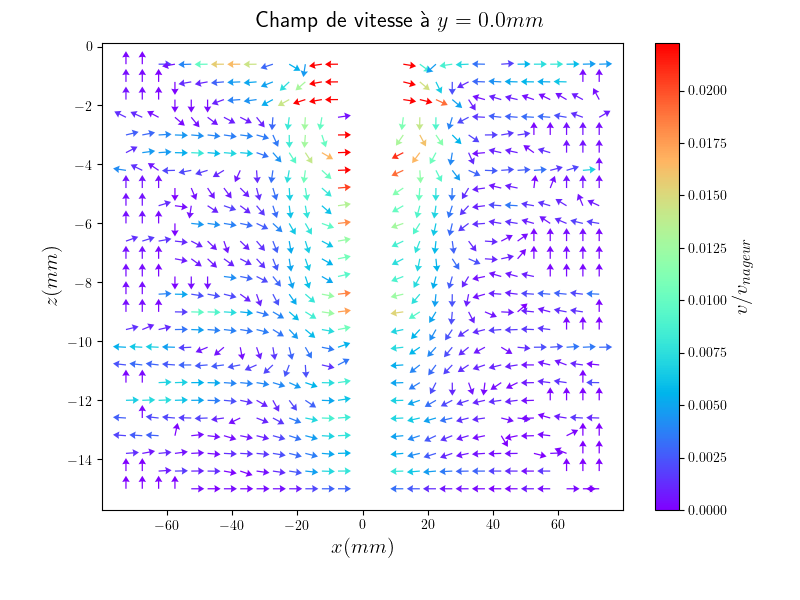

C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


In [46]:
y_plan=29
plot_champ_vitessez(np.transpose(u[:,y_plan,:]),np.transpose(vz[:,y_plan,:]),np.transpose(dx[:,y_plan,:]), -np.transpose(z_2D),r'Champ de vitesse à $y = {} mm$'.format(np.around(dy[0,y_plan,0],decimals=1)),r'$x (mm)$',r'$z (mm)$',y_plan)

<IPython.core.display.Javascript object>


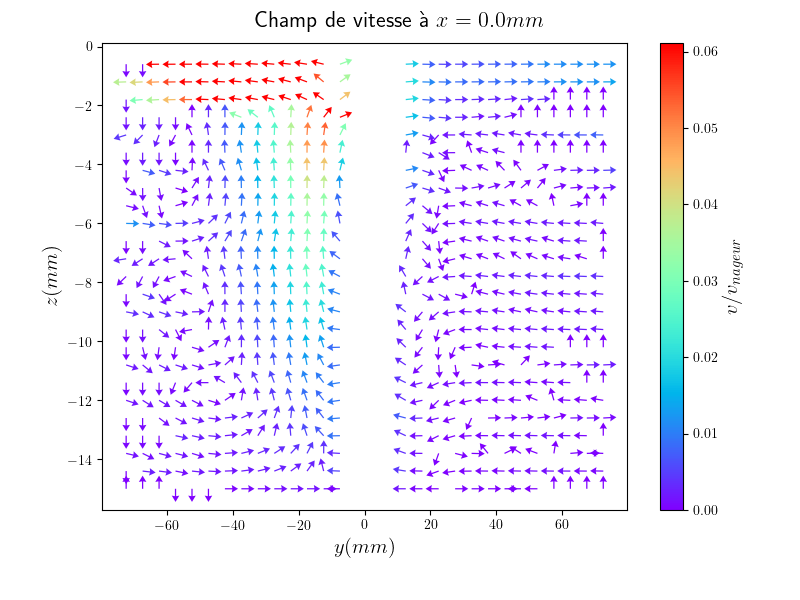

C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


In [51]:
x_plan=29
plot_champ_vitessez(np.transpose(v[:,:,x_plan]),np.transpose(vz[:,:,x_plan]),np.transpose(dy[:,:,x_plan]), -np.transpose(z_2D),r'Champ de vitesse à $x = {} mm$'.format(np.around(dx[0,0,x_plan],decimals=1)),r'$y (mm)$',r'$z (mm)$',x_plan)

## Lignes de champs

In [47]:
def Z(prof):
    if prof==5:
        Z=np.arange(-0.5,-5.1,-0.3)
    elif prof==10:
        Z=np.arange(-0.7,-10,-0.3)
    elif prof==15:
        Z=np.arange(-0.6,-15.1,-0.3)
    return(Z)

def conv(u,plan,variable_fixe):
    "Met les array sous la bonne forme"
    if np.ndim(u)==3:
        if variable_fixe=='x':
            return(np.transpose(u[:,:,plan]))
        elif variable_fixe=='y':
            return(np.transpose(u[:,plan,:]))
    elif np.ndim(u)==4:
        conv=np.zeros((np.shape(u)[0],59,P))
        if variable_fixe=='x':
            for i in range(np.shape(u)[0]):
                conv[i]=np.transpose(u[i,:,:,plan])
            return(conv)
        elif variable_fixe=='y':
            for i in range(np.shape(u)[0]):
                conv[i]=np.transpose(u[i,:,plan,:])
            return(conv)
        
def plot_lignes_champ(u,v,X,Y,title,xlabel,ylabel,plan):
    "Fonction de tracé du champ de vitesse 2D avec les lignes de champ"
    u1=colonne(u,plan,1)
    v1=colonne(v,plan,1)
    velocity=np.sqrt(u1**2+v1**2)
    velmax=np.mean(velocity)+3*np.std(velocity)#norme maximale représentée sur la colormap
    colors = np.copy(velocity)
    colors[velocity>velmax]=velmax
    norm = Normalize()
    norm.autoscale(colors)
    
    
    fig,ax=plt.subplots(num=title,figsize=figsize)
    im=ax.streamplot(X,Y,u1,v1,color=colors,cmap=plt.cm.rainbow)
    fig.colorbar(im.lines,label=r'$v/v_{nageur}$') 
    
    
    fig.suptitle(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=fontsize2)
    plt.ylabel(ylabel,fontsize=fontsize2)
    #plt.tight_layout(pad=3)
    plt.show()

In [48]:
Y=np.arange(-73.75,73.75,2.5)
Z=Z(prof)
print(np.shape(dx))
print(np.shape(vz),np.shape(Z))

(49, 59, 59)
(49, 59, 59) (49,)


<IPython.core.display.Javascript object>


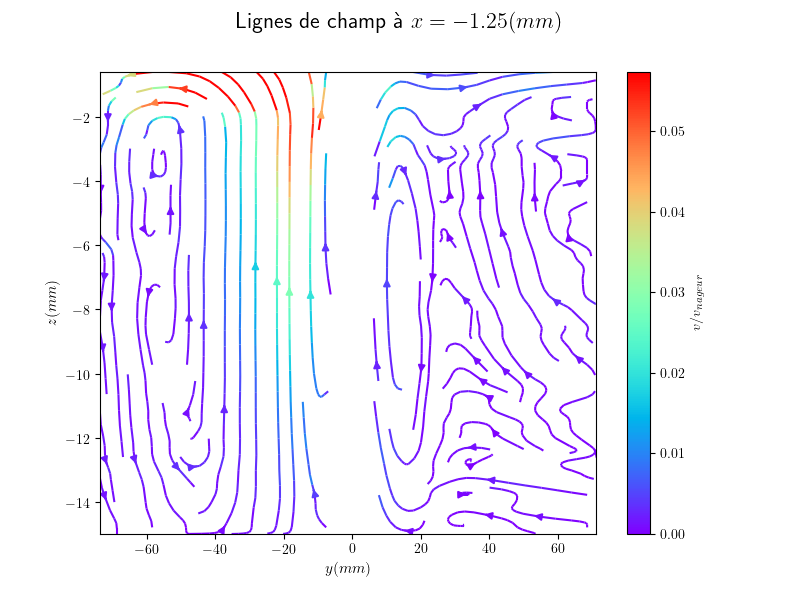

In [49]:
x_plan=29
plot_lignes_champ(np.transpose(conv(v,x_plan,'x')),np.transpose(conv(vz,x_plan,'x')),Y,Z,r'Lignes de champ à $x={} (mm)$'.format(Y[x_plan]), r'$y (mm)$', r'$z (mm)$',x_plan)

<IPython.core.display.Javascript object>


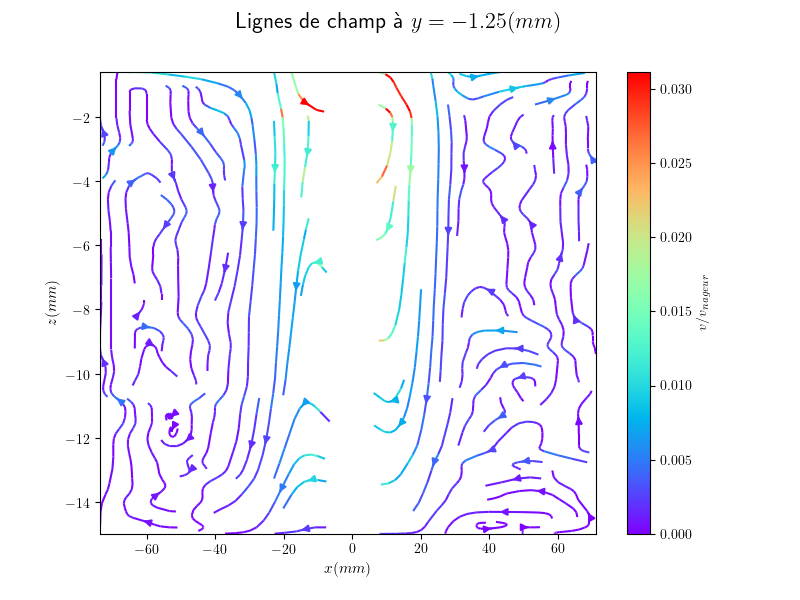

In [50]:
y_plan=29
plot_lignes_champ(np.transpose(conv(v,y_plan,'y')),np.transpose(conv(vz,y_plan,'y')),Y,Z,r"Lignes de champ à $y={} (mm)$".format(Y[y_plan]), r"$x (mm)$", r"$z (mm)$",y_plan)